# Plotting Raw Features from Regression

In this notebook, I take the raw water structure data and facitate plotting a specific feature of interest versus hydration free energies, $\mu_{\nu}$.

## IMPORT MODULES

In [1]:
## MAKE MATPLOTLIB INLINE
%matplotlib inline

## IMPORT OS
import os
## IMPORT NUMPY
import numpy as np  # Used to do math functions
## IMPORT PEARSON R
from scipy.stats import pearsonr
## IMPORT PANDAS
import pandas as pd

## IMPORT GLOBAL INPUTS
from sam_analysis.ml_tools.globals import GROUP_LIST, DATA_LABELS, \
                                          NH2_GROUPS, CONH2_GROUPS, OH_GROUPS, \
                                          NH2_CS_GROUPS, CONH2_CS_GROUPS, OH_CS_GROUPS, \
                                          NH2_MIX_GROUPS, CONH2_MIX_GROUPS, OH_MIX_GROUPS, \
                                          NH2_SEP_GROUPS, CONH2_SEP_GROUPS, OH_SEP_GROUPS

## IMPORT DATA TOOLS
from sam_analysis.ml_tools.data_tools import rescale_data
## FUNCTION TO SAVE AND LOAD PICKLE FILES
from sam_analysis.core.pickles import load_pkl
## IMPORT CHECK SERVER PATH
from sam_analysis.core.check_tools import check_server_path
## IMPORT PLOTTING TOOLS
from sam_analysis.plotting.plots import plot_line_points, plot_parity

## SET PATHS AND LOAD DATA
NOTE: "raw_regression_data.pkl" was converted into a pd.dataframe post analysis. Will need to change output of analysis to the data frame to facitate analysis and reproducibility.

In [2]:
## WORKING DIRECTORY
project_dir = r"/home/bdallin/python_projects/sam_analysis/sam_analysis"
data_dir    = "raw_data"

## DATA FILE
data_pkl = r"raw_regression_data.pkl"

## FIGURE PATHS
manuscript_dir = r"/mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams"
figure_dir     = r"figures"

## LOAD DATA
path_data_pkl = os.path.join( project_dir, data_dir, data_pkl )
raw_data      = load_pkl( path_data_pkl )

LOADING PKL FILE...
LOADED PKL FROM /home/bdallin/python_projects/sam_analysis/sam_analysis/raw_data/raw_regression_data.pkl



In [3]:
raw_data["sample1"].loc["MIX25CONH2"]["num_hbonds_all"]

3.258121660159206

In [4]:
# X_rescaled_df.iloc[ NH2_MIX_GROUPS, : ]

## SPLIT DATA INTO X,Y AND BY CHEMISTRY,SURFACE TYPE
NOTE: commented out is also the option to only split by chemistry if interested

In [5]:
## SPLIT TO X AND Y DATA
X_df = raw_data["sample1"].drop( "hfe_mu", axis = 1 )
y_df = raw_data["sample1"]["hfe_mu"]

## RESCALE X DATA
# X_rescaled    = rescale_data( X_df ) # outputs np.array
# ## CONVERT BACK TO DF
# X_rescaled_df = pd.DataFrame( X_df, # X_rescaled, 
#                               index = GROUP_LIST,
#                               columns = DATA_LABELS )

## SPLIT TO GROUPS
# NH2
X_nh2 = X_df.iloc[ NH2_GROUPS, : ]
y_nh2 = y_df.iloc[ NH2_GROUPS ]

# CONH2
X_conh2 = X_df.iloc[ CONH2_GROUPS, : ]
y_conh2 = y_df.iloc[ CONH2_GROUPS ]

# OH
X_oh = X_df.iloc[ OH_GROUPS, : ]
y_oh = y_df.iloc[ OH_GROUPS ]

# NH2
X_nh2_cs  = X_df.iloc[ NH2_CS_GROUPS, : ]
y_nh2_cs  = y_df.iloc[ NH2_CS_GROUPS ]
X_nh2_mix = X_df.iloc[ NH2_MIX_GROUPS, : ]
y_nh2_mix = y_df.iloc[ NH2_MIX_GROUPS ]
X_nh2_sep = X_df.iloc[ NH2_SEP_GROUPS, : ]
y_nh2_sep = y_df.iloc[ NH2_SEP_GROUPS ]

# CONH2
X_conh2_cs  = X_df.iloc[ CONH2_CS_GROUPS, : ]
y_conh2_cs  = y_df.iloc[ CONH2_CS_GROUPS ]
X_conh2_mix = X_df.iloc[ CONH2_MIX_GROUPS, : ]
y_conh2_mix = y_df.iloc[ CONH2_MIX_GROUPS ]
X_conh2_sep = X_df.iloc[ CONH2_SEP_GROUPS, : ]
y_conh2_sep = y_df.iloc[ CONH2_SEP_GROUPS ]

# OH
X_oh_cs  = X_df.iloc[ OH_CS_GROUPS, : ]
y_oh_cs  = y_df.iloc[ OH_CS_GROUPS ]
X_oh_mix = X_df.iloc[ OH_MIX_GROUPS, : ]
y_oh_mix = y_df.iloc[ OH_MIX_GROUPS ]
X_oh_sep = X_df.iloc[ OH_SEP_GROUPS, : ]
y_oh_sep = y_df.iloc[ OH_SEP_GROUPS ]

## PLOTTING
NOTE: change name of feature to select different water structure features to compare against $\mu_{\nu}$. Alternatively, change feature2 if comparing other feature than $\mu_{\nu}$.

NOTE2: uncomment if only interested in comparing chemistries

In [6]:
## DEFAULT HFE_MU, SWITCH IF INTERESTED IN COMPARING OTHER FEATURE
feature2 = "hfe_mu"

## PLOTTING KWARGS
plt_kwargs = {
               "xerr"         : None,
               "yerr"         : None,
               "title"        : None,
               "xlabel"       : r"$\mu_{INDUS}$", # change if feature2 redefined
               "ylabel"       : None,
               "xticks"       : [ 30, 110, 20 ],
               "yticks"       : [],
               "guideline"    : None,
               "legend"       : [ [ "slateblue", "darkseagreen", "tomato",
                                    "slateblue", "darkseagreen", "tomato", ],
                                  [ "NH2_MIX", "CONH2_MIX", "OH_MIX",
                                    "NH2_SEP", "CONH2_SEP", "OH_SEP" ],
                                  [ "s", "s", "s",
                                    "o", "o", "o", ], ],
               "legend_cols"  : 2,
               "fig_path"     : None,
               }


### FEATURE THETA=48

NH2:   y = -6.14e-07x - 1.13e-03
CONH2: y =  7.95e-07x - 1.07e-03
OH:    y =  1.43e-06x - 1.05e-03

--- CREATING PARITY PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/parity_hfe_mu_vs_theta_48_no_cs


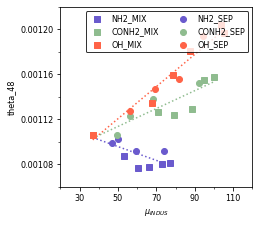

In [7]:
## FEATURE OF INTEREST
feature  = "theta_48"

## PATH TO SAVE FIG FILE
# fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_all".format( feature2, feature ) )
fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_no_cs".format( feature2, feature ) )

## UPDATE KWARGS
plt_kwargs["ylabel"]   = feature
plt_kwargs["fig_path"] = fig_path

## COLORS & MARKERS
colors  = []
markers = []

## CALCULATE LINE FITS
# NH2
colors += [ "slateblue" ]*len(y_nh2_mix) + \
          [ "slateblue" ]*len(y_nh2_sep)
markers += [ "s" ]*len(y_nh2_mix) + \
           [ "o" ]*len(y_nh2_sep)
x_nh2 = np.hstack(( y_nh2_mix, y_nh2_sep ))
y_nh2 = np.hstack(( X_nh2_mix[feature], X_nh2_sep[feature] ))
p = np.polyfit( x_nh2, y_nh2, 1 )
xf_nh2 = np.linspace( x_nh2.min(), x_nh2.max(), 20 )
yf_nh2 = np.polyval( p, xf_nh2 )
print( "NH2:   y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

# CONH2
colors += [ "darkseagreen" ]*len(y_conh2_mix) + \
          [ "darkseagreen" ]*len(y_conh2_sep)
markers += [ "s" ]*len(y_conh2_mix) + \
           [ "o" ]*len(y_conh2_sep)
x_conh2 = np.hstack(( y_conh2_mix, y_conh2_sep ))
y_conh2 = np.hstack(( X_conh2_mix[feature], X_conh2_sep[feature] ))
p = np.polyfit( x_conh2, y_conh2, 1 )
xf_conh2 = np.linspace( x_conh2.min(), x_conh2.max(), 20 )
yf_conh2 = np.polyval( p, xf_conh2 )
print( "CONH2: y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

# OH
colors += [ "tomato" ]*len(y_oh_mix) + \
          [ "tomato" ]*len(y_oh_sep)
markers += [ "s" ]*len(y_oh_mix) + \
           [ "o" ]*len(y_oh_sep)
x_oh = np.hstack(( y_oh_mix, y_oh_sep ))
y_oh = np.hstack(( X_oh_mix[feature], X_oh_sep[feature] ))
p = np.polyfit( x_oh, y_oh, 1 )
xf_oh = np.linspace( x_oh.min(), x_oh.max(), 20 )
yf_oh = np.polyval( p, xf_oh )
print( "OH:    y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

## COMBINE DATA
x1 = np.hstack(( x_nh2, x_conh2 ))
x  = np.hstack(( x1, x_oh ))
y1 = np.hstack(( y_nh2, y_conh2 ))
y  = np.hstack(( y1, y_oh ))

## PLOT PARITY
plt_kwargs["yticks"] = [ 0.00108, 0.00120, 0.00004 ]
plot_parity( x, y,
             colors   = colors,
             markers  = markers,
             fit_line = [ [ xf_nh2, yf_nh2 ], [ xf_conh2, yf_conh2 ], [ xf_oh, yf_oh ] ],
             **plt_kwargs )

NOTES: 

### FEATURE THETA=90

MIX NH2:   y =  1.62e-06x - 1.41e-02
SEP NH2:   y = -5.24e-07x - 1.41e-02
MIX CONH2: y = -8.50e-06x - 1.47e-02
SEP CONH2: y = -3.88e-06x - 1.42e-02
MIX OH:    y = -9.65e-06x - 1.49e-02
SEP OH:    y = -5.32e-06x - 1.43e-02

--- CREATING PARITY PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/parity_hfe_mu_vs_theta_90_no_cs


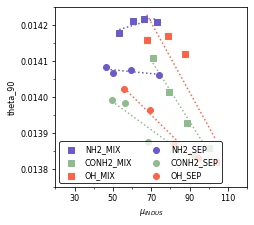

In [8]:
## FEATURE OF INTEREST
feature  = "theta_90"

## PATH TO SAVE FIG FILE
# fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_all".format( feature2, feature ) )
fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_no_cs".format( feature2, feature ) )

## UPDATE KWARGS
plt_kwargs["ylabel"]   = feature
plt_kwargs["fig_path"] = fig_path

## COLORS & MARKERS
colors  = []
markers = []

## CALCULATE LINE FITS
# NH2
colors += [ "slateblue" ]*(len(y_nh2_mix)-2) + \
          [ "slateblue" ]*(len(y_nh2_sep)-2)
markers += [ "s" ]*(len(y_nh2_mix)-2) + \
           [ "o" ]*(len(y_nh2_sep)-2)
x_nh2_m = y_nh2_mix[1:-1]
y_nh2_m = X_nh2_mix[feature][1:-1]
p = np.polyfit( x_nh2_m, y_nh2_m, 1 )
xf_nh2_m = np.linspace( x_nh2_m.min(), x_nh2_m.max(), 20 )
yf_nh2_m = np.polyval( p, xf_nh2_m )
print( "MIX NH2:   y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

x_nh2_s = y_nh2_sep[1:-1]
y_nh2_s = X_nh2_sep[feature][1:-1]
p = np.polyfit( x_nh2_s, y_nh2_s, 1 )
xf_nh2_s = np.linspace( x_nh2_s.min(), x_nh2_s.max(), 20 )
yf_nh2_s = np.polyval( p, xf_nh2_s )
print( "SEP NH2:   y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

# CONH2
colors += [ "darkseagreen" ]*(len(y_conh2_mix)-2) + \
          [ "darkseagreen" ]*(len(y_conh2_sep)-2)
markers += [ "s" ]*(len(y_conh2_mix)-2) + \
           [ "o" ]*(len(y_conh2_sep)-2)
x_conh2_m = y_conh2_mix[1:-1]
y_conh2_m = X_conh2_mix[feature][1:-1]
p = np.polyfit( x_conh2_m, y_conh2_m, 1 )
xf_conh2_m = np.linspace( x_conh2_m.min(), x_conh2_m.max(), 20 )
yf_conh2_m = np.polyval( p, xf_conh2_m )
print( "MIX CONH2: y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

x_conh2_s = y_conh2_sep[1:-1]
y_conh2_s = X_conh2_sep[feature][1:-1]
p = np.polyfit( x_conh2_s, y_conh2_s, 1 )
xf_conh2_s = np.linspace( x_conh2_s.min(), x_conh2_s.max(), 20 )
yf_conh2_s = np.polyval( p, xf_conh2_s )
print( "SEP CONH2: y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

# OH
colors += [ "tomato" ]*(len(y_oh_mix)-2) + \
          [ "tomato" ]*(len(y_oh_sep)-2)
markers += [ "s" ]*(len(y_oh_mix)-2) + \
           [ "o" ]*(len(y_oh_sep)-2)
x_oh_m = y_oh_mix[1:-1]
y_oh_m = X_oh_mix[feature][1:-1]
p = np.polyfit( x_oh_m, y_oh_m, 1 )
xf_oh_m = np.linspace( x_oh_m.min(), x_oh_m.max(), 20 )
yf_oh_m = np.polyval( p, xf_oh_m )
print( "MIX OH:    y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

x_oh_s = y_oh_sep[1:-1]
y_oh_s = X_oh_sep[feature][1:-1]
p = np.polyfit( x_oh_s, y_oh_s, 1 )
xf_oh_s = np.linspace( x_oh_s.min(), x_oh_s.max(), 20 )
yf_oh_s = np.polyval( p, xf_oh_s )
print( "SEP OH:    y = {:9.2e}x - {:8.2e}".format( p[0], p[1] ) )

## COMBINE DATA
x1 = np.hstack(( x_nh2_m, x_nh2_s ))
x2 = np.hstack(( x_conh2_m, x_conh2_s ))
x3 = np.hstack(( x_oh_m, x_oh_s ))
x4 = np.hstack(( x1, x2 ))
x  = np.hstack(( x4, x3 ))
y1 = np.hstack(( y_nh2_m, y_nh2_s ))
y2 = np.hstack(( y_conh2_m, y_conh2_s ))
y3 = np.hstack(( y_oh_m, y_oh_s ))
y4 = np.hstack(( y1, y2 ))
y  = np.hstack(( y4, y3 ))

## PLOT PARITY
plt_kwargs["yticks"] = [ 0.0138, 0.0142, 0.0001 ]
plot_parity( x, y,
             colors   = colors,
             markers  = markers,
             fit_line = [ [ xf_nh2_m, yf_nh2_m ], [ xf_conh2_m, yf_conh2_m ], [ xf_oh_m, yf_oh_m ],
                          [ xf_nh2_s, yf_nh2_s ], [ xf_conh2_s, yf_conh2_s ], [ xf_oh_s, yf_oh_s ] ],
             **plt_kwargs )

### FEATURE NUM. HBONDS ALL

NH2:   y = -5.37e-03x - 3.34
3.258121660159206 3.2769589065161675
CONH2: y =  4.90e-03x - 2.98
OH:    y = -3.70e-04x - 3.18

--- CREATING PARITY PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/parity_hfe_mu_vs_num_hbonds_all_no_cs


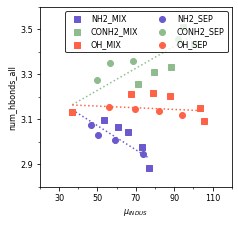

In [9]:
## FEATURE OF INTEREST
feature  = "num_hbonds_all"

## PATH TO SAVE FIG FILE
# fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_all".format( feature2, feature ) )
fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_no_cs".format( feature2, feature ) )

## UPDATE KWARGS
plt_kwargs["ylabel"]   = feature
plt_kwargs["fig_path"] = fig_path

## COLORS & MARKERS
colors  = []
markers = []

## CALCULATE LINE FITS
# NH2
colors += [ "slateblue" ]*len(y_nh2_mix) + \
          [ "slateblue" ]*len(y_nh2_sep)
markers += [ "s" ]*len(y_nh2_mix) + \
           [ "o" ]*len(y_nh2_sep)
x_nh2 = np.hstack(( y_nh2_mix, y_nh2_sep ))
y_nh2 = np.hstack(( X_nh2_mix[feature], X_nh2_sep[feature] ))
p = np.polyfit( x_nh2, y_nh2, 1 )
xf_nh2 = np.linspace( x_nh2.min(), x_nh2.max(), 20 )
yf_nh2 = np.polyval( p, xf_nh2 )
print( "NH2:   y = {:9.2e}x - {:4.2f}".format( p[0], p[1] ) )

# CONH2
colors += [ "darkseagreen" ]*len(y_conh2_mix) + \
          [ "darkseagreen" ]*len(y_conh2_sep)
markers += [ "s" ]*len(y_conh2_mix) + \
           [ "o" ]*len(y_conh2_sep)
x_conh2 = np.hstack(( y_conh2_mix, y_conh2_sep ))
y_conh2 = np.hstack(( X_conh2_mix[feature], X_conh2_sep[feature] ))
print( X_conh2_mix[feature][1], X_conh2_sep[feature][1] )
p = np.polyfit( x_conh2, y_conh2, 1 )
xf_conh2 = np.linspace( x_conh2.min(), x_conh2.max(), 20 )
yf_conh2 = np.polyval( p, xf_conh2 )
print( "CONH2: y = {:9.2e}x - {:4.2f}".format( p[0], p[1] ) )

# OH
colors += [ "tomato" ]*len(y_oh_mix) + \
          [ "tomato" ]*len(y_oh_sep)
markers += [ "s" ]*len(y_oh_mix) + \
           [ "o" ]*len(y_oh_sep)
x_oh = np.hstack(( y_oh_mix, y_oh_sep ))
y_oh = np.hstack(( X_oh_mix[feature], X_oh_sep[feature] ))
p = np.polyfit( x_oh, y_oh, 1 )
xf_oh = np.linspace( x_oh.min(), x_oh.max(), 20 )
yf_oh = np.polyval( p, xf_oh )
print( "OH:    y = {:9.2e}x - {:4.2f}".format( p[0], p[1] ) )

## COMBINE DATA
x1 = np.hstack(( x_nh2, x_conh2 ))
x  = np.hstack(( x1, x_oh ))
y1 = np.hstack(( y_nh2, y_conh2 ))
y  = np.hstack(( y1, y_oh ))

## PLOT PARITY
plt_kwargs["yticks"] = [ 2.9, 3.5, 0.2 ]
plot_parity( x, y,
             colors   = colors,
             markers  = markers, 
             fit_line = [ [ xf_nh2, yf_nh2 ], [ xf_conh2, yf_conh2 ], [ xf_oh, yf_oh ] ],
             **plt_kwargs )

### FEATURE NUM. HBONDS SAM-WATER

FIT: y =  1.05e-02x - -0.37
Pearson's r: 0.95
R^2: 0.91

--- CREATING PARITY PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/parity_hfe_mu_vs_num_hbonds_sam_water_no_cs


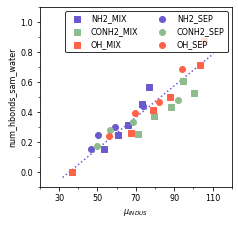

In [10]:
## FEATURE OF INTEREST
feature  = "num_hbonds_sam_water"

## PATH TO SAVE FIG FILE
# fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_all".format( feature2, feature ) )
fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_no_cs".format( feature2, feature ) )

## UPDATE KWARGS
plt_kwargs["ylabel"]   = feature
plt_kwargs["fig_path"] = fig_path

## COLORS & MARKERS
colors  = []
markers = []

## CALCULATE LINE FITS
# NH2
colors += [ "slateblue" ]*len(y_nh2_mix) + \
          [ "slateblue" ]*len(y_nh2_sep)
markers += [ "s" ]*len(y_nh2_mix) + \
           [ "o" ]*len(y_nh2_sep)
x_nh2 = np.hstack(( y_nh2_mix, y_nh2_sep ))
y_nh2 = np.hstack(( X_nh2_mix[feature], X_nh2_sep[feature] ))

# CONH2
colors += [ "darkseagreen" ]*len(y_conh2_mix) + \
          [ "darkseagreen" ]*len(y_conh2_sep)
markers += [ "s" ]*len(y_conh2_mix) + \
           [ "o" ]*len(y_conh2_sep)
x_conh2 = np.hstack(( y_conh2_mix, y_conh2_sep ))
y_conh2 = np.hstack(( X_conh2_mix[feature], X_conh2_sep[feature] ))

# OH
colors += [ "tomato" ]*len(y_oh_mix) + \
          [ "tomato" ]*len(y_oh_sep)
markers += [ "s" ]*len(y_oh_mix) + \
           [ "o" ]*len(y_oh_sep)
x_oh = np.hstack(( y_oh_mix, y_oh_sep ))
y_oh = np.hstack(( X_oh_mix[feature], X_oh_sep[feature] ))

## COMBINE DATA
x1 = np.hstack(( x_nh2, x_conh2 ))
x  = np.hstack(( x1, x_oh ))
y1 = np.hstack(( y_nh2, y_conh2 ))
y  = np.hstack(( y1, y_oh ))
p = np.polyfit( x, y, 1 )
xf = np.linspace( x.min()-5, x.max()+5, 20 )
yf = np.polyval( p, xf )
print( "FIT: y = {:9.2e}x - {:4.2f}".format( p[0], p[1] ) )

## PEARSON'S r
r, pval = pearsonr( x, y )
print( "Pearson's r: {:.2f}".format( r ) )

## R2
corr_mat = np.corrcoef( x, y )
r_sq     = corr_mat[0,1]**2
print( "R^2: {:.2f}".format( r_sq ) )

## PLOT PARITY
plt_kwargs["yticks"] = [ 0, 1.0, 0.2 ]
plot_parity( x, y,
             colors   = colors,
             markers  = markers,
             fit_line = [ [ xf, yf ], ],
             **plt_kwargs )

### FEATURE HBOND SAM-WATER P(0)

FIT: y = -1.90e-02x - 2.52
Pearson's r: -0.95
R^2: 0.90

--- CREATING PARITY PLOT ---
FIGURE SAVED TO: /mnt/c/Users/bdallin/Box Sync/univ_of_wisc/manuscripts/chemically_heterogeneous_sams/figures/parity_hfe_mu_vs_hbond_sam_water_0_no_cs


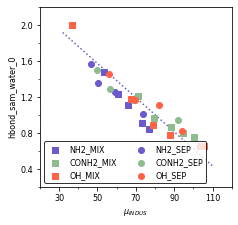

In [11]:
## FEATURE OF INTEREST
feature  = "hbond_sam_water_0"

## PATH TO SAVE FIG FILE
# fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_all".format( feature2, feature ) )
fig_path = os.path.join( manuscript_dir, figure_dir, "parity_{}_vs_{}_no_cs".format( feature2, feature ) )

## UPDATE KWARGS
plt_kwargs["ylabel"]   = feature
plt_kwargs["fig_path"] = fig_path

## COLORS & MARKERS
colors  = []
markers = []

## CALCULATE LINE FITS
# NH2
colors += [ "slateblue" ]*len(y_nh2_mix) + \
          [ "slateblue" ]*len(y_nh2_sep)
markers += [ "s" ]*len(y_nh2_mix) + \
           [ "o" ]*len(y_nh2_sep)
x_nh2 = np.hstack(( y_nh2_mix, y_nh2_sep ))
y_nh2 = np.hstack(( X_nh2_mix[feature], X_nh2_sep[feature] ))

# CONH2
colors += [ "darkseagreen" ]*len(y_conh2_mix) + \
          [ "darkseagreen" ]*len(y_conh2_sep)
markers += [ "s" ]*len(y_conh2_mix) + \
           [ "o" ]*len(y_conh2_sep)
x_conh2 = np.hstack(( y_conh2_mix, y_conh2_sep ))
y_conh2 = np.hstack(( X_conh2_mix[feature], X_conh2_sep[feature] ))

# OH
colors += [ "tomato" ]*len(y_oh_mix) + \
          [ "tomato" ]*len(y_oh_sep)
markers += [ "s" ]*len(y_oh_mix) + \
           [ "o" ]*len(y_oh_sep)
x_oh = np.hstack(( y_oh_mix, y_oh_sep ))
y_oh = np.hstack(( X_oh_mix[feature], X_oh_sep[feature] ))

## COMBINE DATA
x1 = np.hstack(( x_nh2, x_conh2 ))
x  = np.hstack(( x1, x_oh ))
y1 = np.hstack(( y_nh2, y_conh2 ))
y  = np.hstack(( y1, y_oh ))
p = np.polyfit( x, y, 1 )
xf = np.linspace( x.min()-5, x.max()+5, 20 )
yf = np.polyval( p, xf )
print( "FIT: y = {:9.2e}x - {:4.2f}".format( p[0], p[1] ) )

## PEARSON'S r
r, pval = pearsonr( x, y )
print( "Pearson's r: {:.2f}".format( r ) )

## R2
corr_mat = np.corrcoef( x, y )
r_sq     = corr_mat[0,1]**2
print( "R^2: {:.2f}".format( r_sq ) )

## PLOT PARITY
plt_kwargs["yticks"] = [ 0.4, 2.0, 0.4 ]
plot_parity( x, y,
             colors   = colors,
             markers  = markers,
             fit_line = [ [ xf, yf ], ],
             **plt_kwargs )